In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans, AgglomerativeClustering

In [2]:
df= pd.read_csv('WorldHappiness_Corruption_2015_2020.csv')
# Missing data was pre-filled with 0's


## Data Understanding

In [3]:
df.head()

Country  happiness_score  gdp_per_capita    family    health   freedom  \
0       Norway            7.537        1.616463  1.533524  0.796667  0.635423   
1      Denmark            7.522        1.482383  1.551122  0.792566  0.626007   
2      Iceland            7.504        1.480633  1.610574  0.833552  0.627163   
3  Switzerland            7.494        1.564980  1.516912  0.858131  0.620071   
4      Finland            7.469        1.443572  1.540247  0.809158  0.617951   

   generosity  government_trust  dystopia_residual continent  Year  \
0    0.362012          0.315964           2.277027    Europe  2015   
1    0.355280          0.400770           2.313707    Europe  2015   
2    0.475540          0.153527           2.322715    Europe  2015   
3    0.290549          0.367007           2.276716    Europe  2015   
4    0.245483          0.382612           2.430182    Europe  2015   

   social_support  cpi_score  
0             0.0         88  
1             0.0         91  
2             0.0         79  
3             0.0         86  
4             0.0         90

In [4]:
df.describe()

happiness_score  gdp_per_capita      family      health     freedom  \
count       792.000000      792.000000  792.000000  792.000000  792.000000   
mean          5.473310        0.929217    0.504998    0.648691    0.427016   
std           1.124726        0.385774    0.552736    0.232261    0.148003   
min           2.566900        0.000000    0.000000    0.000000    0.000000   
25%           4.590750        0.644242    0.000000    0.510070    0.325433   
50%           5.485500        0.994544    0.000000    0.685397    0.439621   
75%           6.300500        1.228677    1.040410    0.815641    0.546280   
max           7.808700        2.096000    1.610574    1.141000    0.724000   

       generosity  government_trust  dystopia_residual         Year  \
count  792.000000        792.000000         792.000000   792.000000   
mean     0.212440          0.125720           1.379277  2017.500000   
std      0.121660          0.109032           1.075276     1.708904   
min      0.000000          0.000000           0.000000  2015.000000   
25%      0.125784          0.052862           0.000000  2016.000000   
50%      0.197000          0.089000           1.731948  2017.500000   
75%      0.273250          0.154250           2.236894  2019.000000   
max      0.838075          0.551910           3.602140  2020.000000   

       social_support   cpi_score  
count      792.000000  792.000000  
mean         0.609302   44.327020  
std          0.640754   19.508833  
min          0.000000   11.000000  
25%          0.000000   30.000000  
50%          0.176214   38.000000  
75%          1.268250   57.000000  
max          1.644000   91.000000

In [5]:
df.shape
#792 rows, 13 features

(792, 13)

In [6]:
df.dtypes

Country               object
happiness_score      float64
gdp_per_capita       float64
family               float64
health               float64
freedom              float64
generosity           float64
government_trust     float64
dystopia_residual    float64
continent             object
Year                   int64
social_support       float64
cpi_score              int64
dtype: object

In [7]:
# Unique countries in the data set
df['Country'].unique()

array(['Norway', 'Denmark', 'Iceland', 'Switzerland', 'Finland',
       'Netherlands', 'Canada', 'New Zealand', 'Sweden', 'Australia',
       'Israel', 'Costa Rica', 'Austria', 'United States', 'Ireland',
       'Germany', 'Belgium', 'Luxembourg', 'United Kingdom', 'Chile',
       'United Arab Emirates', 'Brazil', 'Argentina', 'Mexico',
       'Singapore', 'Malta', 'Guatemala', 'Uruguay', 'Panama', 'France',
       'Thailand', 'Spain', 'Colombia', 'Saudi Arabia', 'Kuwait',
       'Slovakia', 'Bahrain', 'Malaysia', 'Nicaragua', 'Ecuador',
       'El Salvador', 'Poland', 'Uzbekistan', 'Italy', 'Russia', 'Japan',
       'Lithuania', 'Algeria', 'Latvia', 'Moldova', 'Romania', 'Bolivia',
       'Turkmenistan', 'Kazakhstan', 'Slovenia', 'Peru', 'Mauritius',
       'Cyprus', 'Estonia', 'Belarus', 'Libya', 'Turkey', 'Paraguay',
       'Philippines', 'Serbia', 'Jordan', 'Hungary', 'Jamaica', 'Croatia',
       'Kosovo', 'China', 'Pakistan', 'Indonesia', 'Venezuela',
       'Montenegro', 'Morocco

In [8]:
#count the number of unique countries
df['Country'].nunique()

132

In [9]:
df['Country'].value_counts()

Norway        6
Nigeria       6
Bangladesh    6
Albania       6
Iran          6
             ..
Nicaragua     6
Malaysia      6
Bahrain       6
Slovakia      6
Burundi       6
Name: Country, Length: 132, dtype: int64

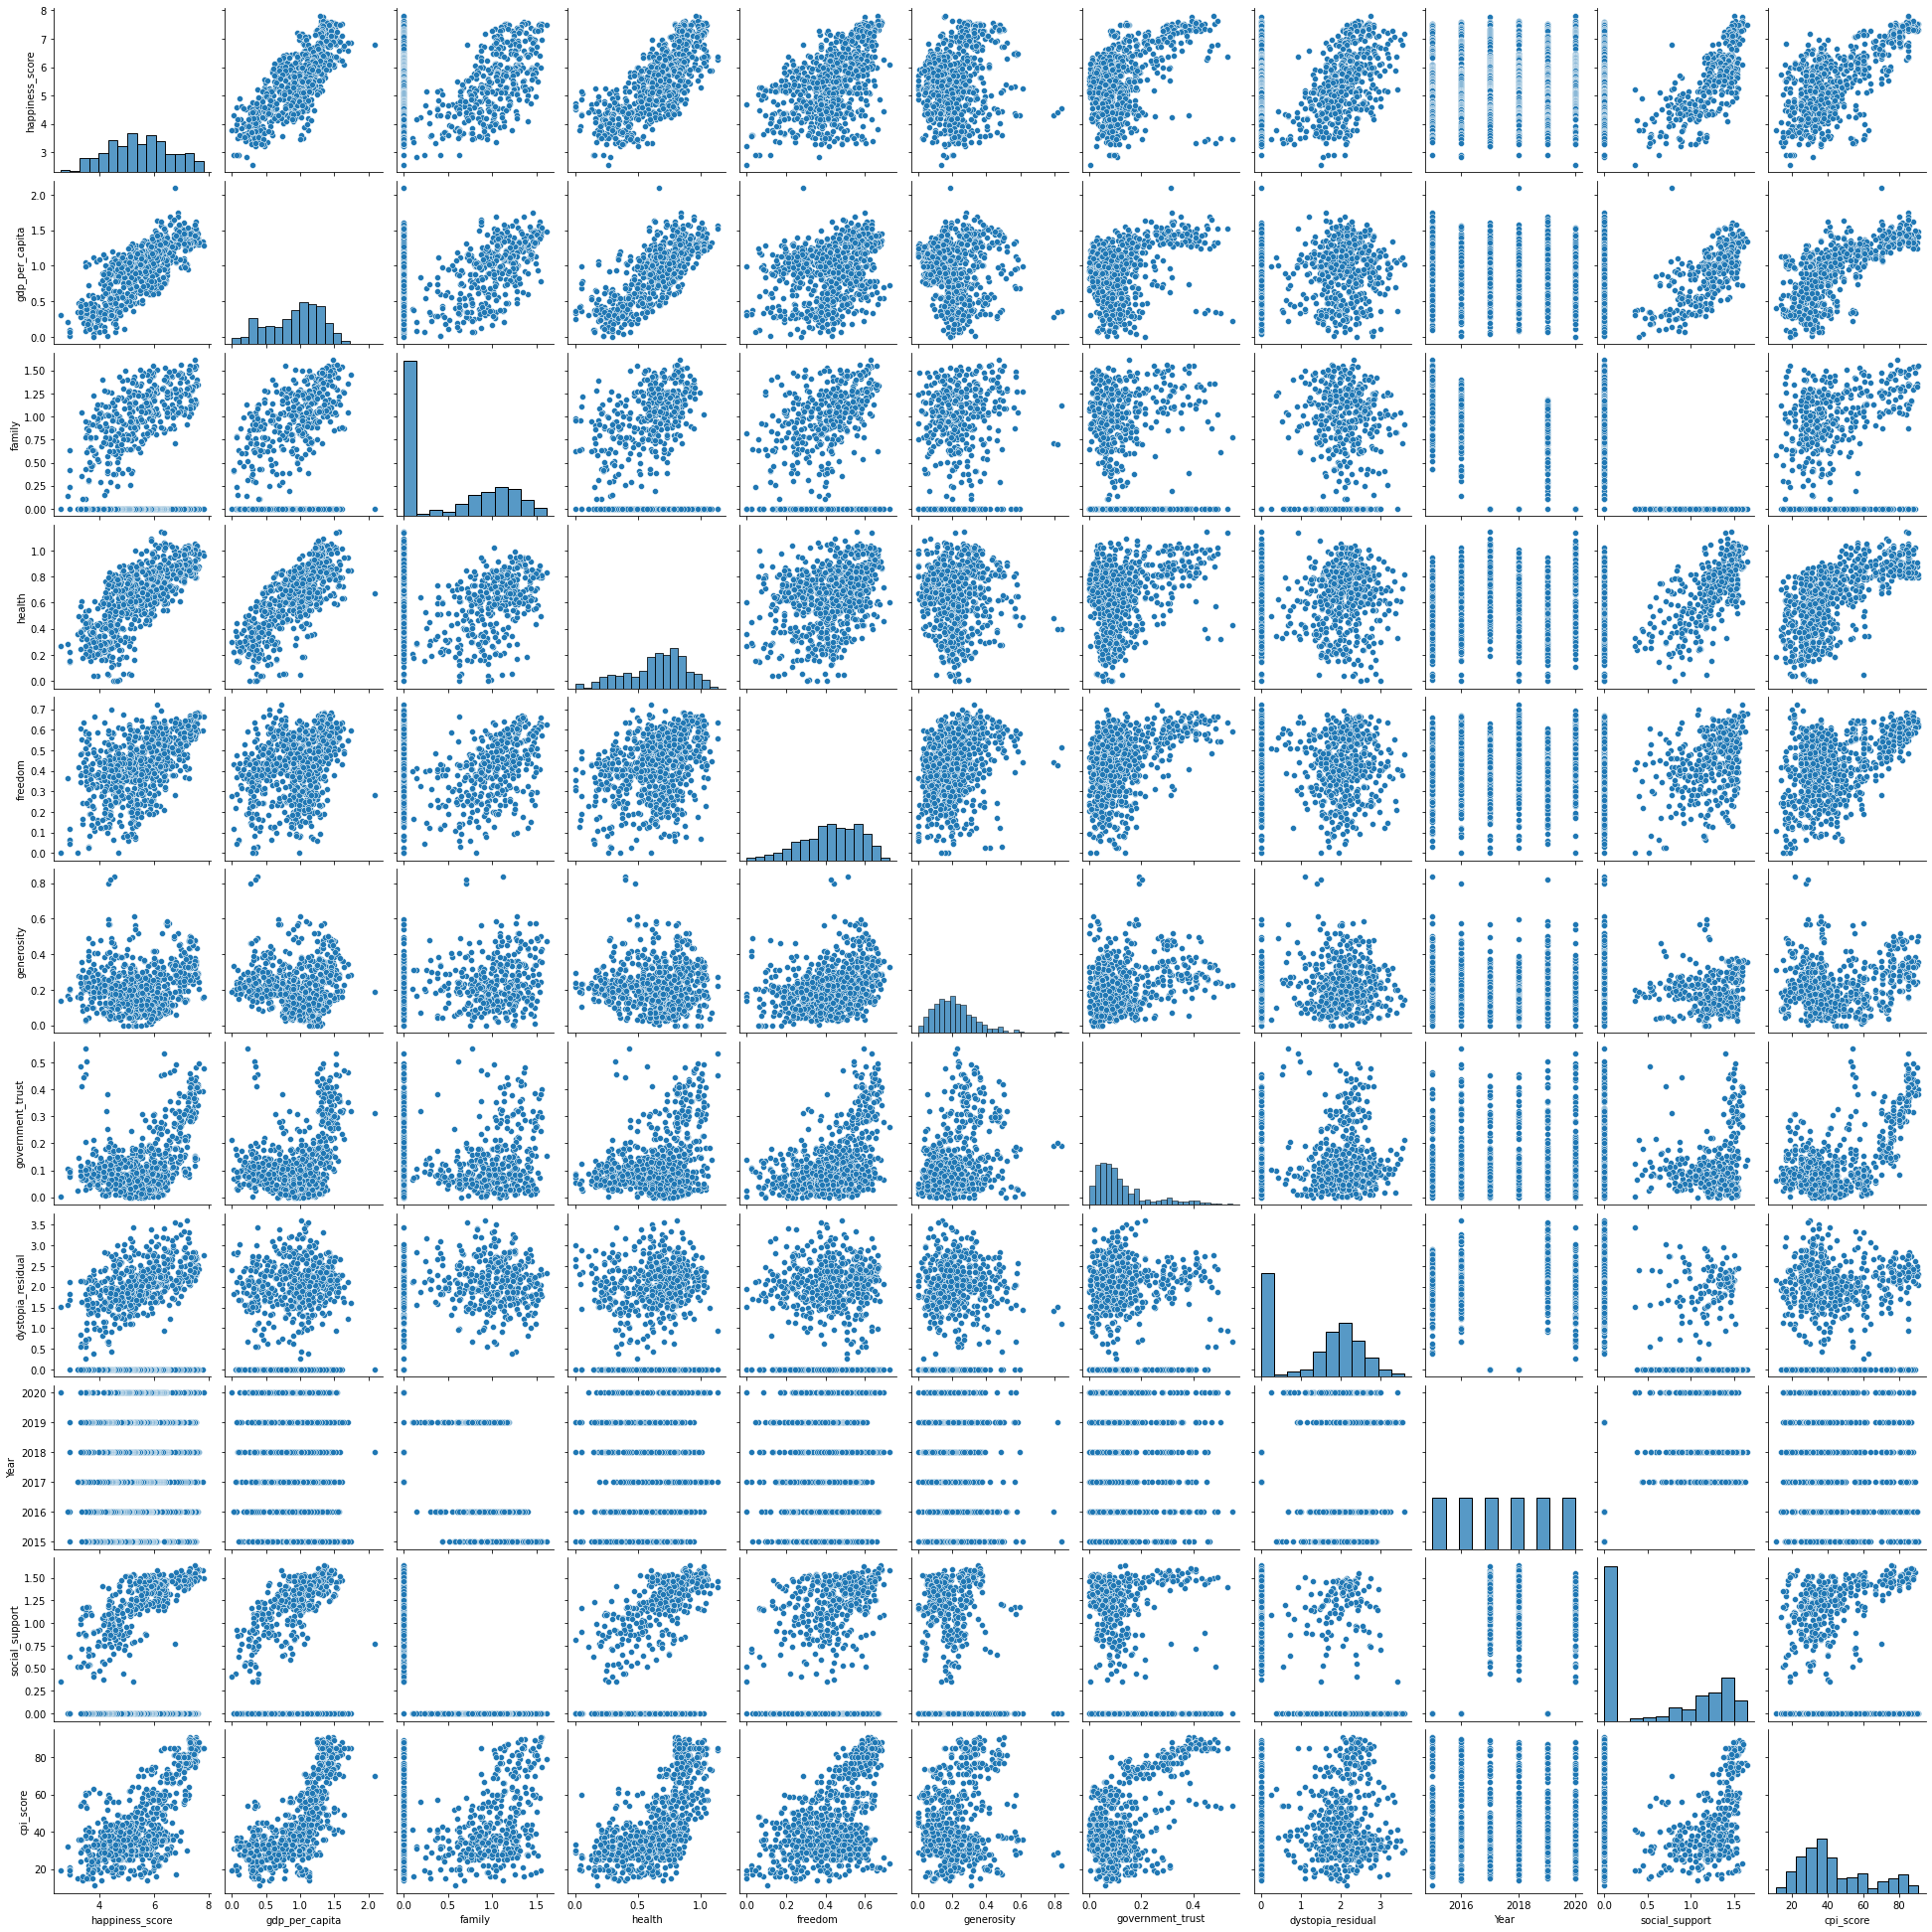

In [10]:
sns.pairplot(df)

<AxesSubplot:xlabel='Year', ylabel='happiness_score'>

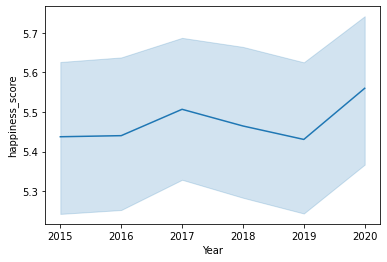

In [11]:
#average happiness score by year
sns.lineplot(data=df, x='Year', y='happiness_score')

<AxesSubplot:xlabel='continent', ylabel='happiness_score'>

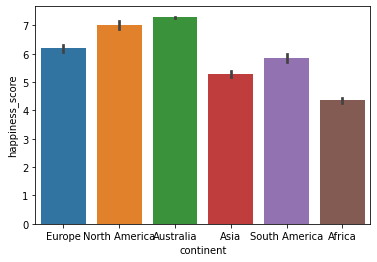

In [12]:
#bar plot of the continent's happiness score
sns.barplot(data=df, x='continent', y='happiness_score')

<AxesSubplot:xlabel='continent', ylabel='government_trust'>

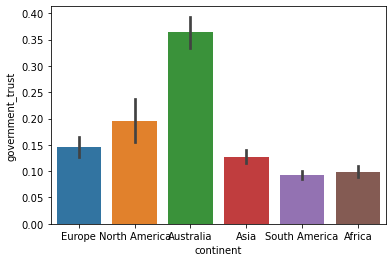

In [13]:
#bar plot of the continents government trust
sns.barplot(data=df, x='continent', y='government_trust')

In [14]:
#highest cpi_score in df
df.groupby(['Country'])['cpi_score'].max().sort_values(ascending=False).head(5)

Country
Denmark        91
New Zealand    91
Finland        90
Sweden         89
Norway         88
Name: cpi_score, dtype: int64

In [15]:
#lowest cpi_score in df
df.groupby(['Country'])['cpi_score'].max().sort_values(ascending=True).head(5)

Country
Yemen          18
Venezuela      18
Libya          18
Afghanistan    19
Iraq           21
Name: cpi_score, dtype: int64

In [16]:
#count the number of countries in continent
df['continent'].value_counts()

Europe           228
Asia             222
Africa           192
South America    120
North America     18
Australia         12
Name: continent, dtype: int64

<AxesSubplot:xlabel='happiness_score', ylabel='freedom'>

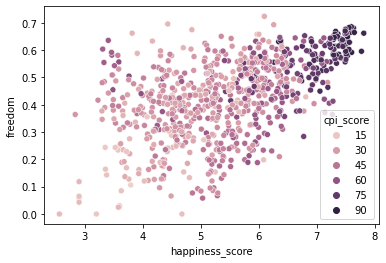

In [17]:
sns.scatterplot(data=df, x='happiness_score', y='freedom', hue='cpi_score')

<AxesSubplot:xlabel='happiness_score', ylabel='government_trust'>

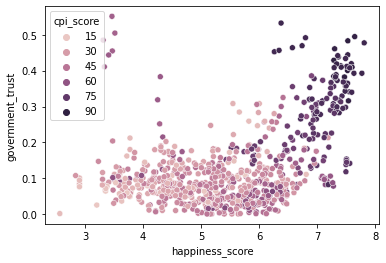

In [18]:
sns.scatterplot(data=df, x='happiness_score', y='government_trust', hue='cpi_score')

<AxesSubplot:>

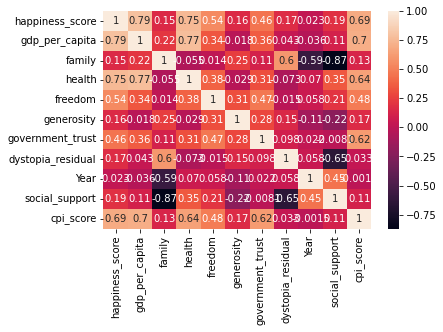

In [19]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='continent', ylabel='count'>

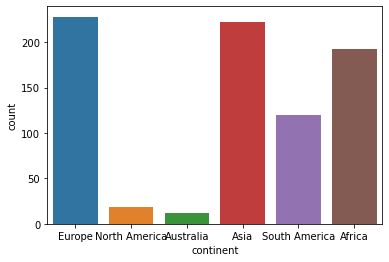

In [20]:
sns.countplot(data=df, x='continent')

<AxesSubplot:xlabel='Year', ylabel='count'>

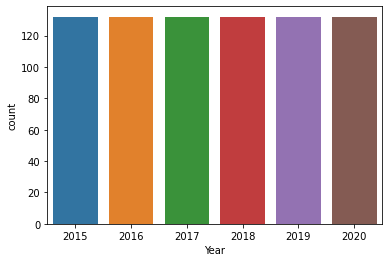

In [21]:
sns.countplot(data=df, x='Year')

<AxesSubplot:xlabel='cpi_score', ylabel='gdp_per_capita'>

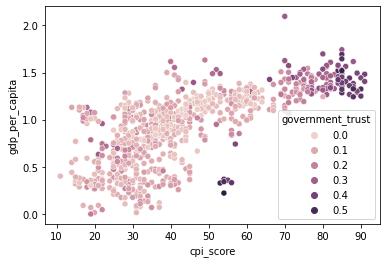

In [22]:
sns.scatterplot(data=df, x='cpi_score', y='gdp_per_capita', hue='government_trust')


## Preprocessing

In [23]:
df.isnull().sum()

Country              0
happiness_score      0
gdp_per_capita       0
family               0
health               0
freedom              0
generosity           0
government_trust     0
dystopia_residual    0
continent            0
Year                 0
social_support       0
cpi_score            0
dtype: int64

## Modeling

In [24]:
#dictionary to give each continent a number
continent_dict = {'Asia': 1, 'Europe': 2, 'Africa': 3, 'North America': 4, 'South America': 5, 'Oceania': 6, 'Australia': 7}

In [25]:
#make a new dataframe, dropping country
df2 = df.drop(['Country'], axis=1)

In [26]:
#replace the continent names with numbers
df2.replace({'continent': continent_dict}, inplace=True)

In [27]:
df2.head()

happiness_score  gdp_per_capita    family    health   freedom  generosity  \
0            7.537        1.616463  1.533524  0.796667  0.635423    0.362012   
1            7.522        1.482383  1.551122  0.792566  0.626007    0.355280   
2            7.504        1.480633  1.610574  0.833552  0.627163    0.475540   
3            7.494        1.564980  1.516912  0.858131  0.620071    0.290549   
4            7.469        1.443572  1.540247  0.809158  0.617951    0.245483   

   government_trust  dystopia_residual  continent  Year  social_support  \
0          0.315964           2.277027          2  2015             0.0   
1          0.400770           2.313707          2  2015             0.0   
2          0.153527           2.322715          2  2015             0.0   
3          0.367007           2.276716          2  2015             0.0   
4          0.382612           2.430182          2  2015             0.0   

   cpi_score  
0         88  
1         91  
2         79  
3         86  
4         90

In [28]:
#create a new dataframe with some features for PCA
X= df2[['gdp_per_capita','health', 'freedom', 'government_trust']]

In [29]:
#create PCA model
pca = PCA(n_components=2)
pca_mdl = pca.fit_transform(X)
pca_df = pd.DataFrame(pca_mdl)

<AxesSubplot:xlabel='0', ylabel='1'>

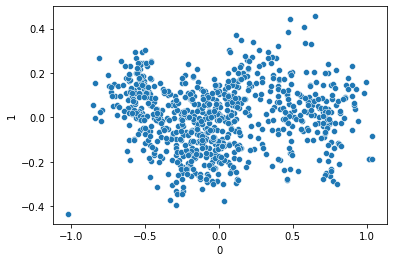

In [30]:
sns.scatterplot(x=pca_df[0], y=pca_df[1])

<AxesSubplot:xlabel='0', ylabel='1'>

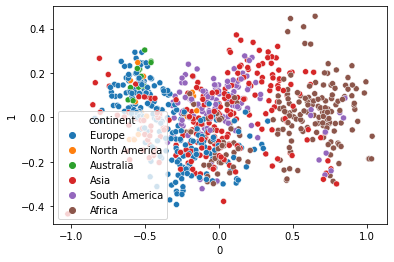

In [31]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=df.continent)

<AxesSubplot:xlabel='0', ylabel='1'>

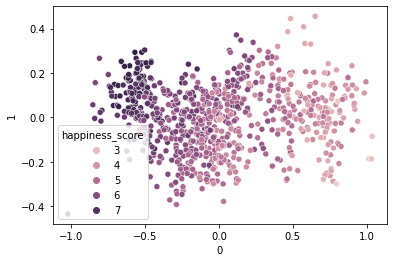

In [32]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=df.happiness_score)

<AxesSubplot:xlabel='0', ylabel='1'>

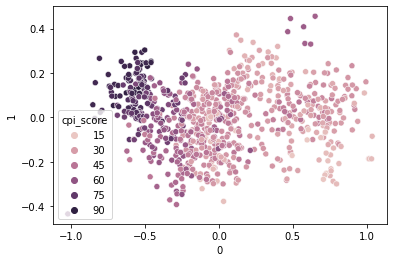

In [33]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=df.cpi_score)

<AxesSubplot:xlabel='0', ylabel='1'>

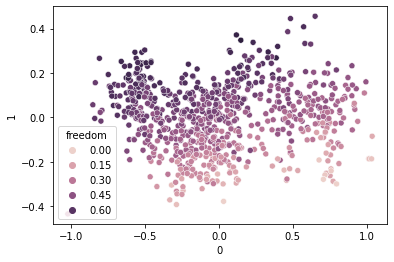

In [34]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=df.freedom)

<AxesSubplot:xlabel='0', ylabel='1'>

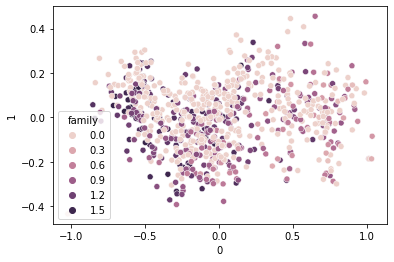

In [35]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=df.family)

In [36]:
#Kmeans clustering
inertia = []
for k in range(1,8):
    kmeans = KMeans(n_clusters=k, random_state=2).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

C:\Users\agpju\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Text(0, 0.5, 'Variance')

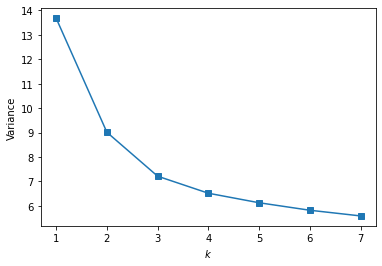

In [37]:
plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('Variance')

In [38]:
#create KMeans model
kmeans= KMeans(n_clusters=2, random_state=2).fit(X)

y=kmeans.fit_predict(X)

<AxesSubplot:xlabel='0', ylabel='1'>

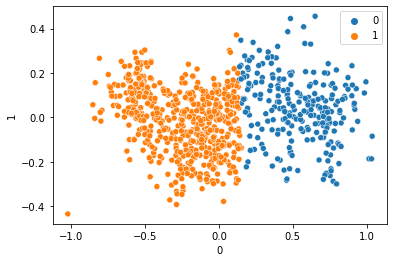

In [39]:
sns.scatterplot(x=pca_df[0], y=pca_df[1], hue=y)

<AxesSubplot:xlabel='happiness_score', ylabel='cpi_score'>

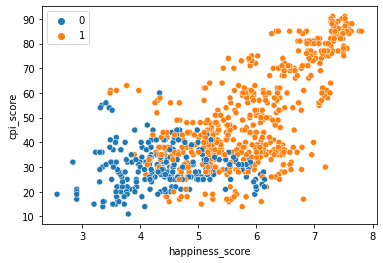

In [40]:
sns.scatterplot(x=df2['happiness_score'], y=df2['cpi_score'], hue=y)

<AxesSubplot:xlabel='happiness_score', ylabel='government_trust'>

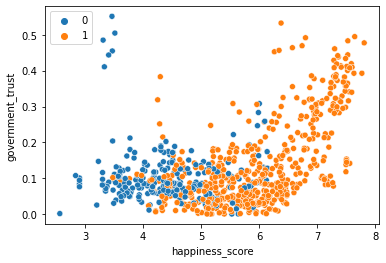

In [41]:
sns.scatterplot(x=df2['happiness_score'], y=df2['government_trust'], hue=y)

<AxesSubplot:xlabel='cpi_score', ylabel='gdp_per_capita'>

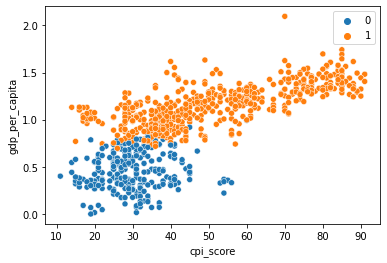

In [42]:
sns.scatterplot(x=df2['cpi_score'], y=df2['gdp_per_capita'], hue=y)

<AxesSubplot:xlabel='happiness_score', ylabel='gdp_per_capita'>

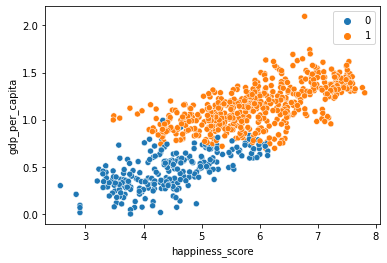

In [43]:
sns.scatterplot(x=df2['happiness_score'], y=df2['gdp_per_capita'], hue=y)

In [44]:
#Adding the cluster back to the original dataframe
y_df = pd.DataFrame(y, columns=['Cluster'])
df3 = pd.concat([df, y_df], axis=1)

In [45]:
df3

Country  happiness_score  gdp_per_capita    family    health  \
0         Norway           7.5370        1.616463  1.533524  0.796667   
1        Denmark           7.5220        1.482383  1.551122  0.792566   
2        Iceland           7.5040        1.480633  1.610574  0.833552   
3    Switzerland           7.4940        1.564980  1.516912  0.858131   
4        Finland           7.4690        1.443572  1.540247  0.809158   
..           ...              ...             ...       ...       ...   
787     Botswana           3.4789        0.997549  0.000000  0.494102   
788     Tanzania           3.4762        0.457163  0.000000  0.442678   
789       Rwanda           3.3123        0.343243  0.000000  0.572383   
790     Zimbabwe           3.2992        0.425564  0.000000  0.375038   
791  Afghanistan           2.5669        0.300706  0.000000  0.266052   

      freedom  generosity  government_trust  dystopia_residual continent  \
0    0.635423    0.362012          0.315964           2.277027    Europe   
1    0.626007    0.355280          0.400770           2.313707    Europe   
2    0.627163    0.475540          0.153527           2.322715    Europe   
3    0.620071    0.290549          0.367007           2.276716    Europe   
4    0.617951    0.245483          0.382612           2.430182    Europe   
..        ...         ...               ...                ...       ...   
787  0.509089    0.033407          0.101786           0.257241    Africa   
788  0.509343    0.271541          0.203881           0.718963    Africa   
789  0.604088    0.235705          0.485542           0.548445    Africa   
790  0.377405    0.151349          0.080929           0.841031    Africa   
791  0.000000    0.135235          0.001226           1.507236      Asia   

     Year  social_support  cpi_score  Cluster  
0    2015        0.000000         88        1  
1    2015        0.000000         91        1  
2    2015        0.000000         79        1  
3    2015        0.000000         86        1  
4    2015        0.000000         90        1  
..    ...             ...        ...      ...  
787  2020        1.085695         60        1  
788  2020        0.872675         38        0  
789  2020        0.522876         54        0  
790  2020        1.047835         24        0  
791  2020        0.356434         19        0  

[792 rows x 14 columns]

In [46]:
!pip install plotly
import plotly.express as px

In [47]:
fig = px.scatter(pd.concat([df3, pca_df], axis = 1), 
                 x = 0, y = 1, color='Cluster', hover_data=['Country','happiness_score','cpi_score','gdp_per_capita', 'continent'])
fig.show()

In [48]:
#top 5 happiest countries
df3.groupby(['Country'])['happiness_score'].max().sort_values(ascending=False).head(5)

Country
Finland        7.8087
Denmark        7.6456
Norway         7.5940
Switzerland    7.5870
Iceland        7.5610
Name: happiness_score, dtype: float64

In [49]:
#lowest 5 happiest (saddest) countries
df3.groupby(['Country'])['happiness_score'].max().sort_values(ascending=True).head(5)

Country
Rwanda         3.5150
Burundi        3.7753
Tanzania       3.7810
Afghanistan    3.7940
Yemen          4.0770
Name: happiness_score, dtype: float64

In [50]:
#Number of countries in each cluster
df3['Cluster'].value_counts()
#Cluster 0: Blue
#Cluster 1: Yellow

1    545
0    247
Name: Cluster, dtype: int64

In [51]:
#Countries in cluster 0
df3[df3['Cluster']==0]['Country'].unique()

array(['Nicaragua', 'Uzbekistan', 'Moldova', 'Bolivia', 'Pakistan',
       'Honduras', 'Nigeria', 'Tajikistan', 'Kyrgyzstan', 'Nepal',
       'Sierra Leone', 'Cameroon', 'Bangladesh', 'Kenya', 'Myanmar',
       'Senegal', 'Zambia', 'Ethiopia', 'India', 'Mauritania', 'Mali',
       'Cambodia', 'Ghana', 'Uganda', 'Burkina Faso', 'Niger', 'Malawi',
       'Chad', 'Zimbabwe', 'Afghanistan', 'Benin', 'Madagascar', 'Haiti',
       'Yemen', 'Liberia', 'Guinea', 'Togo', 'Rwanda', 'Tanzania',
       'Burundi', 'Guatemala', 'Vietnam', 'Philippines', 'Morocco',
       'South Africa', 'Botswana', 'Ukraine'], dtype=object)

In [52]:
#Countries in cluster 1
df3[df3['Cluster']==1]['Country'].unique()

array(['Norway', 'Denmark', 'Iceland', 'Switzerland', 'Finland',
       'Netherlands', 'Canada', 'New Zealand', 'Sweden', 'Australia',
       'Israel', 'Costa Rica', 'Austria', 'United States', 'Ireland',
       'Germany', 'Belgium', 'Luxembourg', 'United Kingdom', 'Chile',
       'United Arab Emirates', 'Brazil', 'Argentina', 'Mexico',
       'Singapore', 'Malta', 'Guatemala', 'Uruguay', 'Panama', 'France',
       'Thailand', 'Spain', 'Colombia', 'Saudi Arabia', 'Kuwait',
       'Slovakia', 'Bahrain', 'Malaysia', 'Ecuador', 'El Salvador',
       'Poland', 'Italy', 'Russia', 'Japan', 'Lithuania', 'Algeria',
       'Latvia', 'Romania', 'Turkmenistan', 'Kazakhstan', 'Slovenia',
       'Peru', 'Mauritius', 'Cyprus', 'Estonia', 'Belarus', 'Libya',
       'Turkey', 'Paraguay', 'Philippines', 'Serbia', 'Jordan', 'Hungary',
       'Jamaica', 'Croatia', 'Kosovo', 'China', 'Indonesia', 'Venezuela',
       'Montenegro', 'Morocco', 'Azerbaijan', 'Dominican Republic',
       'Greece', 'Lebanon', '

In [53]:
#cluster 0 continents
df3[df3['Cluster']==0]['continent'].value_counts()

Africa           141
Asia              70
South America     29
Europe             7
Name: continent, dtype: int64

In [54]:
#cluster 1 continents
df3[df3['Cluster']==1]['continent'].value_counts()

Europe           221
Asia             152
South America     91
Africa            51
North America     18
Australia         12
Name: continent, dtype: int64

## Agglormerative Clustering

In [55]:
#Reusing previous dataframe used for PCA
X= df[['gdp_per_capita','health', 'freedom', 'government_trust']]

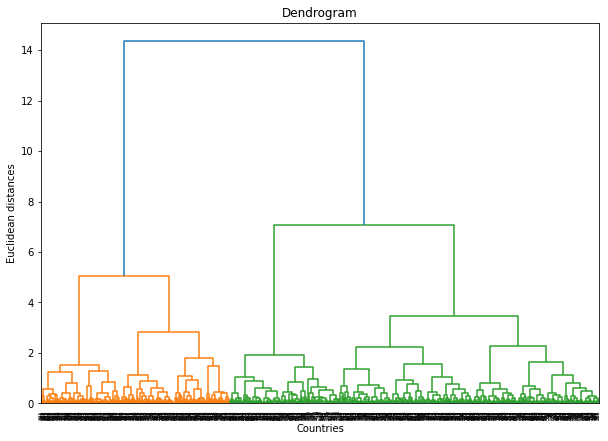

In [56]:
#Create and display a dendrogram
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title('Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean distances')
plt.axhline(y=825, color='r', linestyle='--')
plt.axhline(y=1575, color='r', linestyle='--')
dend = shc.dendrogram(shc.linkage(X, method='ward'))

In [57]:
#Agglo model
agglo = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

y_agglo = agglo.fit_predict(X)

<AxesSubplot:xlabel='0', ylabel='1'>

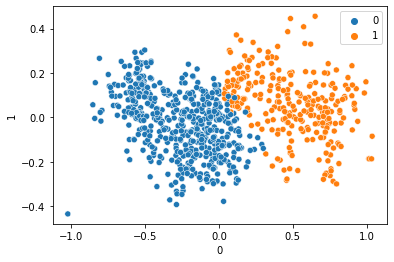

In [58]:
sns.scatterplot(x=pca_df[0], y=pca_df[1], hue=y_agglo)

<AxesSubplot:xlabel='0', ylabel='1'>

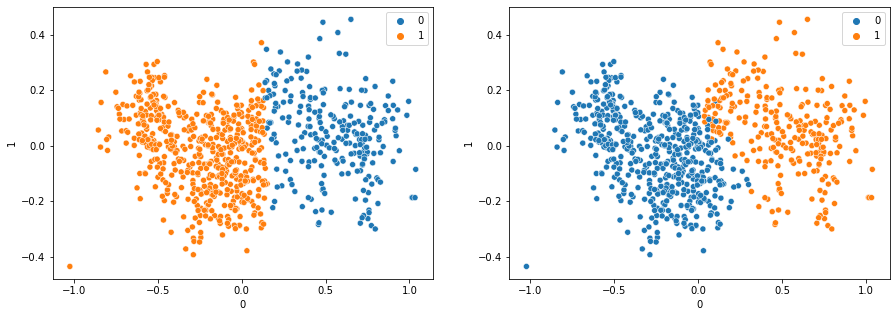

In [59]:
#Plot comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(x=pca_df[0], y=pca_df[1], hue=y, ax=ax1)
sns.scatterplot(x=pca_df[0], y=pca_df[1], hue=y_agglo, ax=ax2)

#Left is from K-Means
#Right is from Agglomerative

In [60]:
# happiest country in europe in 2020
df3[(df3['continent']=='Europe') & (df3['Year']==2020)].groupby(['Country'])['happiness_score'].max().sort_values(ascending=False).head(10)

Country
Finland           7.8087
Denmark           7.6456
Switzerland       7.5599
Iceland           7.5045
Norway            7.4880
Netherlands       7.4489
Sweden            7.3535
Austria           7.2942
Luxembourg        7.2375
United Kingdom    7.1645
Name: happiness_score, dtype: float64

In [61]:
#Choropleth map of clusters in 2020
fig = px.choropleth(df3[df3['Year']==2020], locations="Country",
                    locationmode='country names', color="Cluster",
                    hover_data=["Country", "happiness_score", "cpi_score", "Cluster"], range_color=[0,1],
                    color_continuous_scale="agsunset",
                    title='Clusters in 2020')
fig.show()


In [62]:
#Choropleth map of happiness score in 2020
fig = px.choropleth(df3[df3['Year']==2020], locations="Country",
                    locationmode='country names', color="happiness_score",
                    hover_name="Country", range_color=[0,10],
                    color_continuous_scale="thermal",
                    title='Happiness Score in 2020')
fig.show()


In [63]:
#Choropleth map of cpi_score in 2020
fig = px.choropleth(df3[df3['Year']==2020], locations="Country",
                    locationmode='country names', color="cpi_score",
                    hover_name="Country", range_color=[0,100],
                    color_continuous_scale="deep",
                    title='CPI Score in 2020')
fig.show()

In [71]:
df2

happiness_score  gdp_per_capita    family    health   freedom  \
0             7.5370        1.616463  1.533524  0.796667  0.635423   
1             7.5220        1.482383  1.551122  0.792566  0.626007   
2             7.5040        1.480633  1.610574  0.833552  0.627163   
3             7.4940        1.564980  1.516912  0.858131  0.620071   
4             7.4690        1.443572  1.540247  0.809158  0.617951   
..               ...             ...       ...       ...       ...   
787           3.4789        0.997549  0.000000  0.494102  0.509089   
788           3.4762        0.457163  0.000000  0.442678  0.509343   
789           3.3123        0.343243  0.000000  0.572383  0.604088   
790           3.2992        0.425564  0.000000  0.375038  0.377405   
791           2.5669        0.300706  0.000000  0.266052  0.000000   

     generosity  government_trust  dystopia_residual  continent  Year  \
0      0.362012          0.315964           2.277027          2  2015   
1      0.355280          0.400770           2.313707          2  2015   
2      0.475540          0.153527           2.322715          2  2015   
3      0.290549          0.367007           2.276716          2  2015   
4      0.245483          0.382612           2.430182          2  2015   
..          ...               ...                ...        ...   ...   
787    0.033407          0.101786           0.257241          3  2020   
788    0.271541          0.203881           0.718963          3  2020   
789    0.235705          0.485542           0.548445          3  2020   
790    0.151349          0.080929           0.841031          3  2020   
791    0.135235          0.001226           1.507236          1  2020   

     social_support  cpi_score  
0          0.000000         88  
1          0.000000         91  
2          0.000000         79  
3          0.000000         86  
4          0.000000         90  
..              ...        ...  
787        1.085695         60  
788        0.872675         38  
789        0.522876         54  
790        1.047835         24  
791        0.356434         19  

[792 rows x 12 columns]

# Retrying PCA with Different Variables

In [85]:
#create a new dataframe with some features for PCA 
X= df2[['happiness_score', 'cpi_score']]

In [87]:
#create PCA model
pca = PCA(n_components=2)
pca_mdl = pca.fit_transform(X)
pca_df = pd.DataFrame(pca_mdl)

<AxesSubplot:xlabel='0', ylabel='1'>

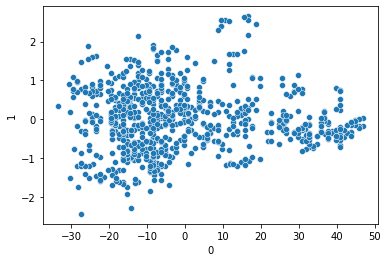

In [88]:
sns.scatterplot(x=pca_df[0], y=pca_df[1])

<AxesSubplot:xlabel='0', ylabel='1'>

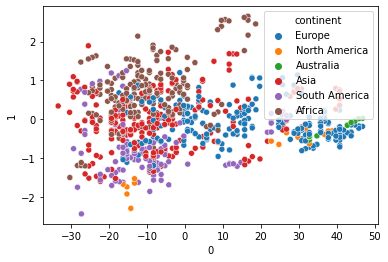

In [109]:
sns.scatterplot(x=pca_df[0], y=pca_df[1], hue=df.continent)

<AxesSubplot:xlabel='0', ylabel='1'>

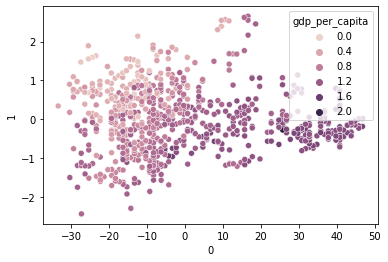

In [89]:
sns.scatterplot(x=pca_df[0], y=pca_df[1], hue=df.gdp_per_capita)

<AxesSubplot:xlabel='0', ylabel='1'>

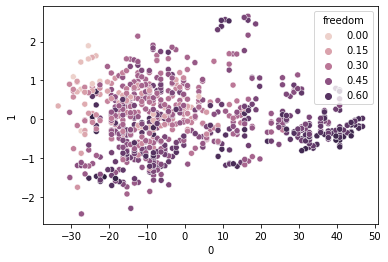

In [91]:
sns.scatterplot(x=pca_df[0], y=pca_df[1], hue=df.freedom)

<AxesSubplot:xlabel='0', ylabel='1'>

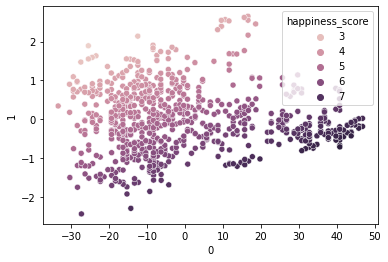

In [92]:
sns.scatterplot(x=pca_df[0], y=pca_df[1], hue=df.happiness_score)

<AxesSubplot:xlabel='0', ylabel='1'>

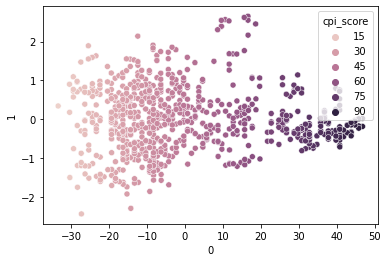

In [93]:
sns.scatterplot(x=pca_df[0], y=pca_df[1], hue=df.cpi_score)

<AxesSubplot:xlabel='0', ylabel='1'>

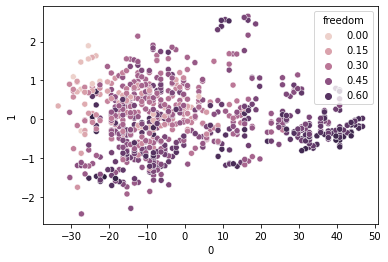

In [110]:
sns.scatterplot(x=pca_df[0], y=pca_df[1], hue=df.freedom)

<AxesSubplot:xlabel='0', ylabel='1'>

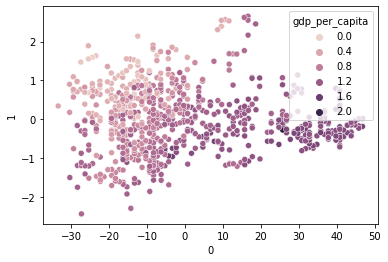

In [94]:
sns.scatterplot(x=pca_df[0], y=pca_df[1], hue=df.gdp_per_capita)

In [95]:
#Kmeans clustering
inertia = []
for k in range(1,8):
    kmeans = KMeans(n_clusters=k, random_state=2).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

C:\Users\agpju\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.



Text(0, 0.5, 'Variance')

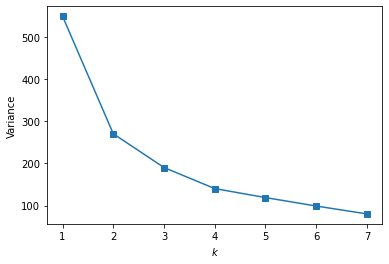

In [96]:
plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('Variance')

In [97]:
kmeans= KMeans(n_clusters=2, random_state=2).fit(X)

In [98]:
y=kmeans.fit_predict(X)

<AxesSubplot:xlabel='0', ylabel='1'>

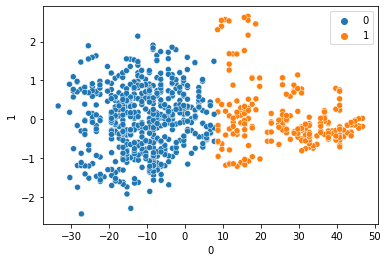

In [99]:
sns.scatterplot(x=pca_df[0], y=pca_df[1], hue=y)

<AxesSubplot:xlabel='happiness_score', ylabel='cpi_score'>

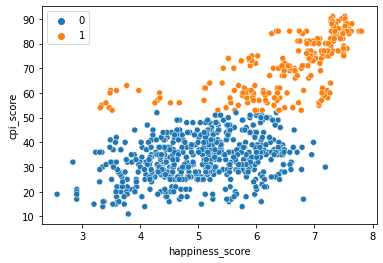

In [111]:
sns.scatterplot(x=df2['happiness_score'], y=df2['cpi_score'], hue=y)

<AxesSubplot:xlabel='happiness_score', ylabel='government_trust'>

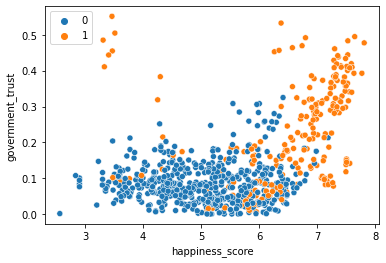

In [112]:
sns.scatterplot(x=df2['happiness_score'], y=df2['government_trust'], hue=y)

<AxesSubplot:xlabel='cpi_score', ylabel='government_trust'>

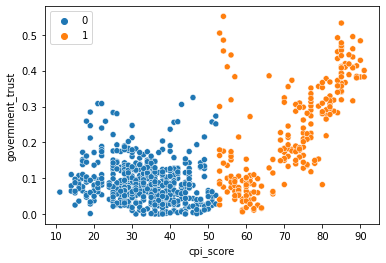

In [102]:
sns.scatterplot(x=df2['cpi_score'], y=df2['government_trust'], hue=y)

<AxesSubplot:xlabel='cpi_score', ylabel='gdp_per_capita'>

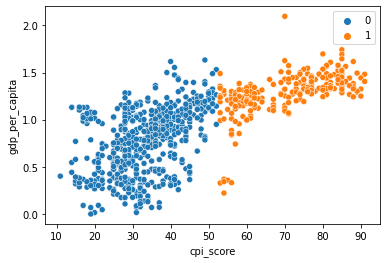

In [113]:
sns.scatterplot(x=df2['cpi_score'], y=df2['gdp_per_capita'], hue=y)

<AxesSubplot:xlabel='happiness_score', ylabel='gdp_per_capita'>

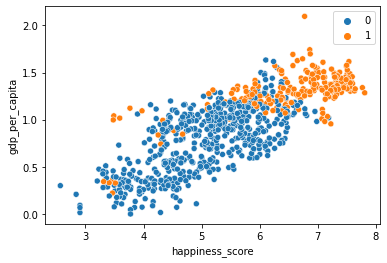

In [114]:
sns.scatterplot(x=df2['happiness_score'], y=df2['gdp_per_capita'], hue=y)

<AxesSubplot:xlabel='generosity', ylabel='happiness_score'>

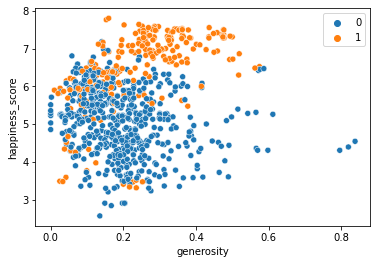

In [108]:
sns.scatterplot(x=df2['generosity'], y=df2['happiness_score'], hue=y)

In [115]:
#Adding the cluster back to the original dataframe
y_df = pd.DataFrame(y, columns=['Cluster'])
df4 = pd.concat([df, y_df], axis=1)

In [116]:
fig = px.scatter(pd.concat([df4, pca_df], axis = 1), 
                 x = 0, y = 1, color='Cluster', hover_data=['Country','happiness_score','cpi_score','gdp_per_capita', 'continent'])
fig.show()

# Agglomerative Clustering

In [118]:
#create a new dataframe with some features for PCA
X= df[['happiness_score', 'cpi_score']]

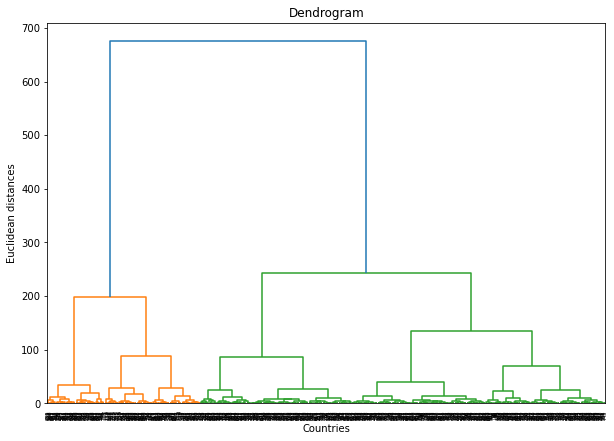

In [119]:
#Create and display a dendrogram
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title('Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean distances')
plt.axhline(y=825, color='r', linestyle='--')
plt.axhline(y=1575, color='r', linestyle='--')
dend = shc.dendrogram(shc.linkage(X, method='ward'))

In [120]:
#Agglo model
agglo = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

y_agglo = agglo.fit_predict(X)

<AxesSubplot:xlabel='0', ylabel='1'>

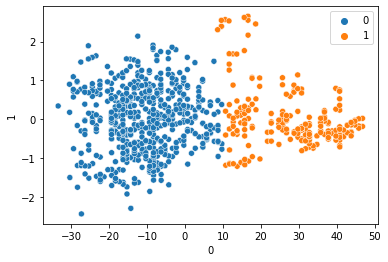

In [121]:
sns.scatterplot(x=pca_df[0], y=pca_df[1], hue=y_agglo)

<AxesSubplot:xlabel='0', ylabel='1'>

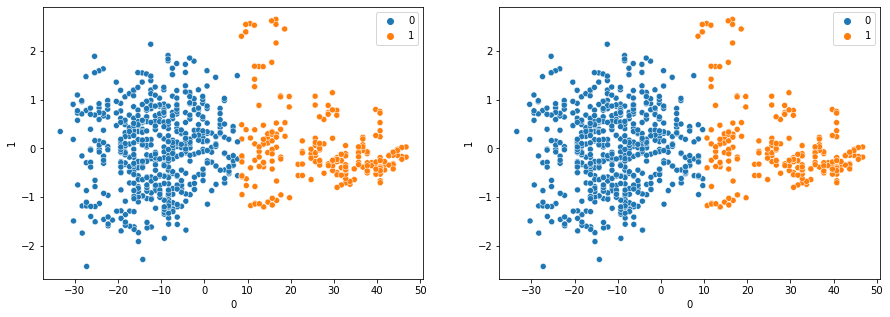

In [123]:
#Plot comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(x=pca_df[0], y=pca_df[1], hue=y, ax=ax1)
sns.scatterplot(x=pca_df[0], y=pca_df[1], hue=y_agglo, ax=ax2)
#Left is K-Means -- Right is Agglomerative

In [128]:
#Choropleth map of clusters in 2020
fig = px.choropleth(df4[df4['Year']==2020], locations="Country",
                    locationmode='country names', color="Cluster",
                    hover_data=["Country", "happiness_score", "cpi_score", "Cluster", "gdp_per_capita"], range_color=[0,1],
                    color_continuous_scale="agsunset",
                    title='Clusters in 2020')
fig.show()

In [125]:
#Choropleth map of happiness in 2020
fig = px.choropleth(df4[df4['Year']==2020], locations="Country",
                    locationmode='country names', color="happiness_score",
                    hover_data=["Country", "happiness_score", "cpi_score", "Cluster"], range_color=[0,10],
                    color_continuous_scale="Thermal",
                    title='Happiness in 2020')
fig.show()

In [127]:
#Choropleth map of Corruption in 2020
fig = px.choropleth(df4[df4['Year']==2020], locations="Country",
                    locationmode='country names', color="cpi_score",
                    hover_data=["Country", "happiness_score", "cpi_score", "Cluster"], range_color=[0,100],
                    color_continuous_scale="Deep",
                    title='Corruption in 2020 (Higher is better)')
fig.show()